<h1 style="font-family: Arial; font-weight: 900; color: magenta; text-align: center;">INTRODUCTION TO PANDAS<br>AND MATPLOTLIB</h1><br>

<br/><div style="font-family: Arial; color: darkblue; font-size: 14px; font-weight: 600"><a id="toc"></a>
In this document:
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[1. Preparation of the dataframe](#1)</p>
        <p style="margin: 0 0 0 4rem">[1a. Import and export with csv](#1a)</p>
        <p style="margin: 0 0 0 4rem">[1b. Selecting columns and rows](#1b)</p>
        <p style="margin: 0 0 0 4rem">[1c. Modifying column names and value denominations of a dataframe](#1c)</p><br/>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[2. Data analysis](#2)</p>
        <p style="margin: 0 0 0 4rem">[2a. Data manipulation](#2a)</p>
        <p style="margin: 0 0 0 4rem">[2b. Data analysis](#2b)</p><br/>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[3. Data visualization](#3)</p><br/></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageio.v2 import imread

# Beautify the code results by using colors
from colorama import Fore, Back, Style
# Define some strings for cleaner codes
BB = Fore.BLUE + Style.BRIGHT
MB = Fore.MAGENTA + Style.BRIGHT

# Beautify the dataframes by using colors
def beautify(df):
    # df.style creates a Styler object from the DataFrame df, which allows styling to be applied to the
    # dataframe's representation; then 'set_table_styles' applies css styling (eg 'text-align: center')
    # to the table header cells (<th>) and data cells (<td>) of the dataframe
    styled_df = df.style.set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'), ('color', 'blue')]}, 
        {'selector': 'td', 'props': [('text-align', 'center'), ('color', 'magenta'), ('font-weight', 'bold')]}])    
    # The Styler object resets the precision of floats to 6 decimal places, whatever their original format; only
    # the display is affected, though, not the original data; here, the floats are float64 numbers and correspond
    # to revenues, so I reformat their display to 2 decimal places
    return styled_df.format({col: '{:.2f}'.format for col in df.select_dtypes(include=['float64'])})

# Beautify figures by rendering them in SVG quality instead of JPG
# (don't use this if you prefer lightweight notebooks)
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("svg")
# we'll use the "cyberpunk" color map
cmap = plt.get_cmap("cool")

<a id="1"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>1. PREPARATION OF THE DATAFRAME</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1a. Import and export with csv</font><a id="1a"></a></p>$\quad$
    We <font color='darkpink'>import a <font color='green'>csv</font> file</font> with <font color='green'>pd.read_csv</font>. We <font color='darkpink'>export in a <font color='green'>csv</font> format</font> with <font color='green'>to_csv</font>.<br>$\quad$
    The <font color='green'>head(n)</font> (resp. <font color='green'>tail(n)</font>) methods take the parameter <font color='green'>n</font> to <font color='darkpink'>specify the number of first (resp. last) rows to display</font>. The default value for <font color='green'>n</font> is $5$.<br>$\quad$
    We can check the columns' data-types with the <font color='green'>info()</font> method :

In [2]:
# import a csv file
df = pd.read_csv("Burger Joint.csv")
beautify(df.head(7))

In [3]:
beautify(df.tail(3))

In [4]:
# export in a csv format
df.to_csv("Burger Joint exported.csv", index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer id           20000 non-null  object 
 1   age_group             20000 non-null  object 
 2   gender                20000 non-null  object 
 3   cheeseburger          8656 non-null   float64
 4   bacon burger          3383 non-null   float64
 5   chili cheese          1704 non-null   float64
 6   blue cheese mushroom  2389 non-null   float64
 7   double cheese         4178 non-null   float64
 8   double bacon          1764 non-null   float64
 9   crispy chicken        1525 non-null   float64
 10  vegan burger          1198 non-null   float64
 11  revenue               20000 non-null  int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 1.8+ MB


<br><br><div style="font-family: Arial; font-size:14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1b. Selecting columns and rows</font><a id="1b"></a></p>$\quad$
        We can <font color='darkpink'>extract the columns we are interested in</font> by using double brackets and specifying the columns' names :

In [6]:
selected_columns = df[["age_group", "gender", "revenue"]]
beautify(selected_columns.head(7))

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can <font color='darkpink'>extract sub-dataframes by specifying the rows and columns</font> we are interested in. Rows can be specified via their indices, either by their values or their ranks (eg rank 3 corresponds to the fourth index, whatever its value). Columns can also be specified by their values (ie their names) or their ranks. When specifying rows and columns by their values (resp. ranks) we use the <font color='green'>loc</font> (resp. <font color='green'>iloc</font>) method. For example :

In [7]:
# selects rows with index value 3 and 6, and columns by their names
beautify(df.loc[[3,6], ["age_group", "gender", "revenue"]])

In [8]:
# selects rows and columns by their ranks
beautify(df.iloc[[3,6], [1, 2, 11]])

<div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        With <font color='green'>loc</font> and <font color='green'>iloc</font>, we can easily <font color='darkpink'>select a subset of consecutive rows</font>. We simply use Python's indexing (eg <font color='darkred'>3:6</font>); however, note that with <font color='green'>loc</font> the upper bound will be included, while it won't with <font color='green'>iloc</font>. For example :

In [9]:
# selects consecutive rows using 'loc'
beautify(df.loc[3:6, ["age_group", "gender", "revenue"]])

In [10]:
# selects consecutive rows using 'iloc'
beautify(df.iloc[3:6, [1, 2, 11]])

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can <font color='darkpink'>extract rows based on the conditions we are interested in</font> by using single brackets and specifying the rows' categories. When using conditional operators to specify our selection, each condition must be enclosed in parentheses, and the logical operators must be written as <font color='magenta'>|</font> for <font color='darkcyan'>or</font> and <font color='magenta'>&</font> for <font color='darkcyan'>and</font> :

In [11]:
selected_rows = df[(df["age_group"] == "60 years") | ((df["age_group"] == "20 - 29 years") & (df["gender"] == "Male"))]
beautify(selected_rows.tail())

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        <font color='darkpink'>We can use conditions within the 'loc' function</font>. For example :

In [12]:
beautify(selected_rows.loc[selected_rows["cheeseburger"] > 50, ["age_group", "gender", "revenue"]].tail())

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can <font color='darkpink'>order the rows of a dataframe according to a column's values</font> and specify if we want an ascending or descending order, by using the <font color='green'>sort_values</font> method and the <font color='green'>ascending</font> parameter, which is <font color='green'>True</font> by default :

In [13]:
vegan_burger_filter = df[df["vegan burger"].notnull()].sort_values(by = "vegan burger", ascending = False)
beautify(vegan_burger_filter.head())

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can <font color='darkpink'>merge two dataframes</font> based on a common column, by using the <font color='green'>merge(left, right, how='inner', on=None, left_on=None, right_on=None)</font> function, where :<br>
    * <font color='green'>left</font> and <font color='green'>right</font> specify the left and right dataframes respectively.<br>
    * <font color='green'>how='inner'</font> specifies the type of join. It performs an <font color='green'>'inner'</font> join by default, where only rows with matching values along the join column are kept. Other possibilities are <font color='green'>'outer'</font>, <font color='green'>'left'</font> and <font color='green'>'right'</font>, where all columns in both (resp. left / right) dataframes are kept, the missing values in either (resp. the right / the left) being filled with <font color='green'>NaN</font><br>
    * <font color='green'>on=None</font> specifies the name of the column along which the join should be performed<br>
    * <font color='green'>left_on=None</font> and <font color='green'>right_on=None</font> specify the names of the join column when its name is not the same in both dataframes.<br>$\quad$
        For example, we can merge

In [14]:
df_customers = pd.DataFrame({'customer_id': [1, 2, 3, 4, 5], 'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva']})
beautify(df_customers)

<div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    and

In [15]:
df_orders = pd.DataFrame({'order_id': [101, 102, 103, 104, 105], 'customer_id': [3, 2, 1, 5, 4], 'order_value': [250, 150, 200, 300, 350]})
beautify(df_orders)

<div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    along the "customer_id" column, with an inner join (although, in this case, both dataframes have identical join columns, so the different join types will yield the same result), via

In [16]:
merged_df = pd.merge(df_customers, df_orders, on='customer_id')
beautify(merged_df)

<br><br><div style="font-family: Arial; font-size:14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1c. Modifying column names and value denominations of a dataframe</font><a id="1c"></a></p>$\quad$
        We can <font color='darkpink'>remove the rows where a <font color='magenta'>nan</font> appears</font> in a particular column, by using the <font color='green'>notnull()</font> method (note: <font color='green'>notnull()</font> only checks for missing values (<font color='magenta'>nan</font> or <font color='magenta'>nan</font>), not for $0$; its misleading name comes from databases denominations). <font color='green'>notnull()</font> doesn't modify the dataframe in place, it creates a new dataframe. For example :

In [17]:
beautify(df[df["vegan burger"].notnull()].tail())

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can <font color='darkpink'>replace the missing values</font> with whatever values we want, using the <font color='green'>fillna(value)</font> method, where <font color='green'>value</font> is the desired value. Again, <font color='green'>fillna</font> doesn't modify the dataframe in place, it creates a new dataframe.<br>$\quad$
        For example here, the <font color='magenta'>nan</font> in the columns corresponding to any burger type should be $0$. Using the <font color='green'>columns</font> attribute we retrieve the names of all the dataframe columns :

In [18]:
print(BB + "The columns of the dataframe are :\n" + MB, df.columns)

The columns of the dataframe are :
 Index(['customer id', 'age_group', 'gender', 'cheeseburger', 'bacon burger',
       'chili cheese ', 'blue cheese mushroom', 'double cheese',
       'double bacon', 'crispy chicken', 'vegan burger', 'revenue'],
      dtype='object')


<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    so we can copy-paste the columns corresponding to the burger types and replace the <font color='magenta'>nan</font> by $0$ :

In [19]:
burger_columns = ['cheeseburger', 'bacon burger', 'chili cheese ', 'blue cheese mushroom', 'double cheese', 'double bacon',
                  'crispy chicken', 'vegan burger']
df[burger_columns] = df[burger_columns].fillna(0)
beautify(df.tail())

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    We can also <font color='darkpink'>rename the columns</font>, using the <font color='green'>rename</font> method. Since <font color='green'>rename</font> creates a copy of the dataframe, we can assign its result to the original dataframe if we don’t need the old column names. As an example, let's rename the "customer id" and "revenue" columns to "id" and "total_rev" respectively :

In [20]:
df = df.rename(columns = {"customer id": "id", "revenue": "total_rev"})
beautify(df.tail())

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    Inside a column, <font color='darkpink'>we can replace a value denomination with another</font>, using the <font color='green'>replace</font> method. For example :

In [21]:
df["age_group"] = df["age_group"].replace("not specified", "unknown")
beautify(df.tail())

<a id="2"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>2. DATA ANALYSIS</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2a. Data manipulation</font><a id="2a"></a></p>$\quad$
        We can <font color='darkpink'>add columns to a dataframe</font>. For example, let's add a column corresponding to the sum of the beef burger revenues per customer :

In [22]:
beef_columns = ['cheeseburger', 'bacon burger', 'chili cheese ', 'double cheese', 'double bacon']
df["beef_rev"] = df[beef_columns].sum(axis=1)
beautify(df.tail())

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    We want the "beef_rev" column to be composed of integers, ie to <font color='darkpink'>change the type of its values</font> from <font color='darkcyan'>float64</font> to <font color='darkcyan'>int</font>. We know that they are all integers in disguise, so we can simply apply the <font color='green'>astype(var_type)</font> method, where <font color='green'>var_type</font> is the desired type, here <font color='darkcyan'>int</font>.<br>$\quad$
    We also want the "beed_rev" column to appear before the "total_rev" column. For this, we simply need to specify the desired order of columns :

In [23]:
df["beef_rev"] = df["beef_rev"].astype(int)
df = df[['id', 'age_group', 'gender', 'cheeseburger', 'bacon burger', 'chili cheese ', 'blue cheese mushroom',
        'double cheese', 'double bacon', 'crispy chicken', 'vegan burger', 'beef_rev', 'total_rev']]
beautify(df.tail())

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can <font color='darkpink'>remove a list of columns</font> from a dataframe in a similar way, by simply not including them in the list of columns.<br>
    Or, more explicitly, by using the <font color='green'>drop(columns=list, inplace=True)</font> method, where <font color='green'>list</font> is the list of columns to remove and <font color='green'>inplace=True</font> modifies our original dataframe (<font color='green'>inplace=False</font> by default, meaning a new dataframe without the columns in <font color='green'>list</font> would be created). For example, let's display our dataframe without the "beef_rev" column :

In [24]:
beautify(df.drop(columns = ["beef_rev"]).tail())

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We may <font color='darkpink'>remove outliers</font> by simply keeping the rows with a <font color='blue'>total_rev</font> more than the $0.01$ quantile and less than the $0.99$ quantile :

In [25]:
df_sample = df[(df["total_rev"] > df["total_rev"].quantile(0.01)) & (df["total_rev"] < df["total_rev"].quantile(0.99))]
print(BB + "The number of rows in the dataframe excluding the first and last 1% quantiles is" + MB, df_sample.shape[0])

The number of rows in the dataframe excluding the first and last 1% quantiles is 19511


<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We may <font color='darkpink'>group the elements of a column</font> according to their category, in order to perform some computations on them (eg, in order to get the means of the "total_rev" by "age_group").<br>$\quad$
        The result will be a <font color='green'>Series</font>, not a <font color='green'>Dataframe</font>. So, in order to rename the column "total_rev" into "mean_rev" in the resulting table, we need to convert it into a dataframe first. This is done using the <font color='green'>to_frame(name="new_column_name")</font> method, where <font color='green'>"new_column_name"</font> is our desired new name :

In [26]:
mean_rev_by_age_group = df.groupby("age_group")["total_rev"].mean().to_frame(name="mean_rev")
beautify(mean_rev_by_age_group)

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We <font color='darkpink'>create a pivot table</font> (definition below) with the <font color='green'>pivot_table(data, index='index_column', columns='pivot_columns', values='numeric_column', aggfunc='mean')</font> method.<br>
    A pivot table groups along the unique categories of the <font color='green'>index</font> column, and for each combination of categories in the <font color='green'>columns</font> argument, it performs the <font color='green'>aggfunc</font> operation (like <font color='green'>'mean'</font>, <font color='green'>'sum'</font>, <font color='green'>'count'</font>, etc.) on the <font color='green'>values</font> column.<br>
    <font color='green'>columns</font> is optional, and the default for <font color='green'>aggfunc</font> is the <font color='green'>'mean'</font> (computed with numpy).<br>$\quad$
        For example :

In [27]:
beautify(df.pivot_table(index="age_group", columns="gender", values="total_rev", aggfunc='sum'))

<br><br><div style="font-family: Arial; font-size:14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2b. Data analysis</font><a id="2b"></a></p>$\quad$
        We can <font color='darkpink'>display the basic statistics of a dataframe</font>, by using the <font color='green'>describe()</font> method. It returns some statistics for each numerical column : <font color='green'>count</font> is its number of non <font color='magenta'>NaN</font> elements, and pandas displays it as a float because of how it is computed and used internally; <font color='green'>mean</font> and <font color='green'>std</font> are its mean and standard deviation; <font color='green'>min</font> and <font color='green'>max</font> are its minimum and maximum; and <font color='green'>25%</font>, <font color='green'>50%</font> and <font color='green'>75%</font> are its quartiles.<br>$\quad$
        Note that, since we replaced the missing values with $0$, and since there were many missing values, these statistics are not representative of the original dataframe means, standard deviations and quartiles.<br>$\quad$
        Anyway, these are the data returned by the <font color='green'>describe()</font> method :

In [28]:
beautify(df.describe())

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        If we want to <font color='darkpink'>check the number of unique values in a column, and their values</font>, we can use the <font color='green'>nunique()</font> and <font color='green'>unique()</font> methods :

In [29]:
print(BB + "There are" + MB, df["age_group"].nunique(), BB + "age categories :")
print(MB, df["age_group"].unique())

There are 7 age categories :
 ['50 - 59 years' 'unknown' '60 years' '20 - 29 years' '30 - 39 years'
 '40 - 49 years' 'less than 20 years']


<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can <font color='darkpink'>check how many instances of each unique value there are</font> by using the <font color='green'>value_counts()</font> method :

In [30]:
beautify(df["age_group"].value_counts().to_frame())

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The correlation matrix associated with a dataframe $D$ is the matrix whose $(i,j)$-th coefficient is the covariance between the standardized $i$-th and $j$-th numerical columns:<br><p style="margin: 0 0 .5rem 0"></p><font color = 'darkpink'>
        $$\text{Cov}\left(D_i^{(s)},D_j^{(s)}\right) \;=\; \frac{\text{Cov}(D_i, D_j)}{\sigma_i\;\sigma_j} \qquad (1)$$</font>
    where $D_i$ and $D_j$ are the $i$-th and $j$-th columns of the dataframe, $D_i^{(s)}$ and $D_j^{(s)}$ are their standardized versions, while $\sigma_i$ and $\sigma_j$ are their standard deviations.<br>$\quad$
        We can obtain its dataframe version by using the <font color='green'>df.corr(numeric_only=True)</font> method :

In [31]:
beautify(df.corr(numeric_only=True))

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We see that there is a strong relationship between the "beef_rev" and the "total_rev" variables; and that, usually, people who buy a "cheeseburger" don't buy a "double cheese" burger (and vice versa), and even that people who buy a burger tend to not buy a second one.<br><br>$\quad$
        We can get the favorite burger (in terms of revenue spent) for each customer by using the <font color='green'>idxmax(axis=1)</font> method :

In [32]:
beautify(df[burger_columns].idxmax(axis=1).to_frame(name="favorite burger").head())

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can get the maximum revenue spent in one go in each burger category by using the <font color='green'>idxmax(axis=0)</font> method :

In [33]:
beautify(df[burger_columns].idxmax(axis=0).to_frame(name="max rev in 1 go"))

<a id="3"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>3. DATA VISUALIZATION</font></h4>$\quad$
        In this chapter, we present several diagrams created with <font color='green'>Matplotlib</font>, using functions from <font color='green'>pandas</font> and <font color='green'>Matplotlib</font>.<br>$\quad$
        All codes produce a diagram, and I present all the functions within the codes. The reader should first find the diagram of interest, and then read the code to see how it is done. The datasets used to create the diagrams are of little importance, although I clearly define them.<br>$\quad$
        Let's start with a histogram, still based on the dataset we've been using so far, using <font color='green'>pandas' hist()</font> function :

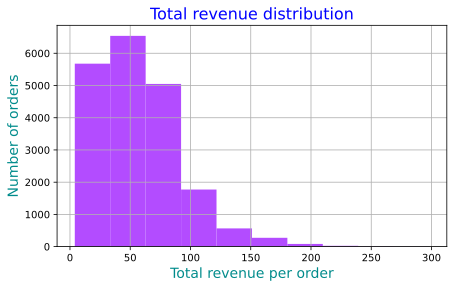

In [34]:
plt.figure(figsize=(7, 4))    # specifies the size of the figure if printed
# creates a histogram of the "total_rev" column, using pandas' 'hist()' function
df["total_rev"].hist(color=cmap(0.7))
plt.title("Total revenue distribution", fontsize=16, color='blue')    # adds a title
plt.xlabel("Total revenue per order", fontsize=14, color='darkcyan')    # adds a label for the x-axis
plt.ylabel("Number of orders", fontsize=14, color='darkcyan')    # adds a label for the y-axis
# displays the plot resulting from all the code lines written since the previous 'plt.show()' command
# (see cell 38 for a cell with 2 'plt.show')
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Let's create a <font color='darkpink'>bar chart</font> showing the average revenue by age group :

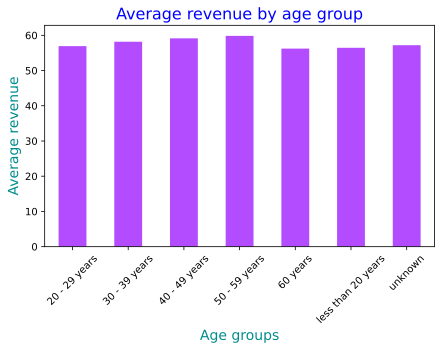

In [35]:
avg_rev = df.groupby("age_group")["total_rev"].mean()

plt.figure(figsize=(7, 4))
plt.title("Average revenue by age group", fontsize=16, color='blue')
# creates a bar chart for "avg_rev", using pandas' 'plot()' function
avg_rev.plot(kind='bar', x="age_group", color=cmap(0.7))
plt.xticks(rotation=45)    # rotates the x-axis tick labels
plt.xlabel("Age groups", fontsize = 14, color='darkcyan')
plt.ylabel("Average revenue", fontsize = 14, color='darkcyan')
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Let's create a <font color='darkpink'>scatter plot</font> for "total_rev" vs "beef_rev". This time, if we want to customize our axes, we need to explicitly create an "<font color='green'>ax</font>" object. This is done like this :

In [36]:
# creates a figure and axis explicitly
fig, ax = plt.subplots(figsize=(7, 4))

# creates the scatter plot for "total_rev" vs "beef_rev" using pandas
df.plot(kind='scatter', x="total_rev", y="beef_rev", ax=ax, color=(0, 1, 1, 0.8))
ax.set_title("Total revenue vs Beef revenue", fontsize=16, color='blue')
ax.set_xlabel("Total revenue", fontsize=14, color='darkcyan')
ax.set_ylabel("Beef revenue", fontsize=14, color='darkcyan')
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Let's create a <font color='darkpink'>pie chart</font> showing the gender proportions :

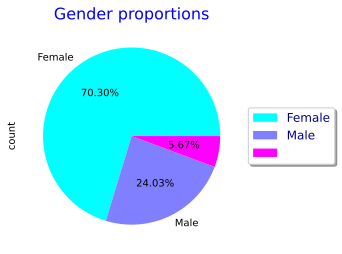

In [37]:
gender_counts = df["gender"].value_counts()

plt.figure(figsize=(7, 4))
# creates a pie chart for "avg_rev", using the "cool" color map, and displaying the proportions
# as percentages with two decimal places
gender_counts.plot(kind='pie', cmap='cool', autopct='%1.2f%%')
plt.title("Gender proportions", fontsize=16, color='blue')
# displays the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The most common type of diagram is a <font color='darkpink'>simple curve</font>. On a computer screen, as on any medium, a curve is represented as a sequence of straight line segments. As usual, it illustrates the dependence of one variable on another, such as the evolution of temperatures at noon during April 2024 (at some hypothetical location).<br>$\quad$
        We can display a curve by using again pandas' <font color='green'>plot</font> function, this time with the <font color='green'>kind='line'</font> argument (which is optional, because <font color='green'>'line'</font> is the default for <font color='green'>kind</font>), and specifying the data <font color='green'>x</font> and <font color='green'>y</font> for the x and y axes respectively.<br>$\quad$
        Another possibility would be to use the <font color='green'>Matplotlib</font>'s <font color='green'>plot(x,y)</font> function, still with <font color='green'>x</font> and <font color='green'>y</font> as the data for the x and y axes.<br>$\quad$
        Let's compare these two functions :

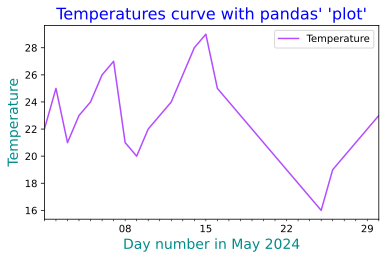

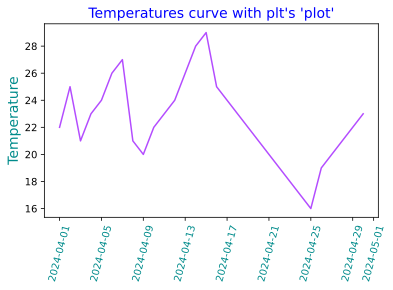

In [38]:
# Hypothetical temperature data
temperature_data = pd.DataFrame({
    "Date": pd.date_range(start='2024-04-01', periods=30, freq='D'),
    "Temperature": [22, 25, 21, 23, 24, 26, 27, 21, 20, 22, 23, 24, 26, 28, 29,
                    25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 19, 20, 21, 22, 23]})


# Representation using pandas' plot function
fig, ax = plt.subplots(figsize=(6, 3.5))
# creates the line plot for "total_rev" vs "beef_rev" using pandas
ax.set_title("Temperatures curve with pandas' 'plot'", fontsize=16, color='blue')
# "kind='line'" is not necessary, since 'line' is the default
temperature_data.plot(kind='line', x="Date", y="Temperature", ax=ax, color=cmap(0.7))
ax.set_xlabel("Day number in May 2024", fontsize=14, color='darkcyan')
plt.xticks([])    # removes ticks labels (here there would be only one, "May 2024")
ax.set_ylabel("Temperature", fontsize=14, color='darkcyan')
plt.show()


# Representation using matplotlib's plot function
plt.figure(figsize=(6, 3.5))
plt.title("Temperatures curve with plt's 'plot'", fontsize=14, color='blue')
plt.plot(temperature_data["Date"], temperature_data["Temperature"], color=cmap(0.7))
plt.xticks(rotation=75, color='darkcyan')
plt.ylabel("Temperature", fontsize=14, color='darkcyan')
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Using matplotlib's <font color='green'>plot(x,y)</font> function, we can display the dots without connecting them with straight lines in the same way, but by adding a string argument, called a <font color='darkpink'>marker string</font> that specifies how we want the points to appear. Typically, this string consists of two characters, the first corresponds to the first letter of the desired color (eg "b" for blue, "r" for red,...) and the second corresponds to the desired shape (eg "s" for squares, "o" for disks, "^" for triangles,...).<br>$\quad$
        <font color='darkpink'>Some possible colors are :</font><font color='purple'> "b": blue; "r": red; "y": yellow; "m": magenta; "g": green; "c": cyan; "k": black; "w": white.</font><br>
    While <font color='darkpink'>some possible shapes are :</font><font color='purple'> "o": disk; ".": dot; "s": square; "^": upward triangle; "v": downward triangle; "<": leftward triangle; ">": rightward triangle; "x": cross; "+": plus sign; "*": star; "D": diamond; "d": thin diamond; "p": pentagon; "h": hexagon; "_": underscore.</font><br>$\quad$
        For example :

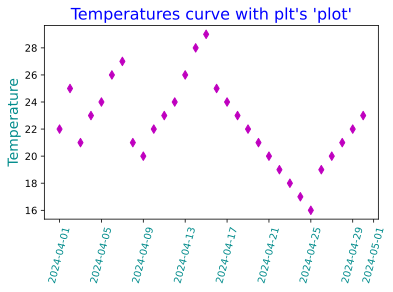

In [39]:
# Representation using matplotlib's plot function
plt.figure(figsize=(6, 3.5))
plt.plot(temperature_data["Date"], temperature_data["Temperature"], "md")
plt.xticks(rotation=75, color='darkcyan')
plt.title("Temperatures curve with plt's 'plot'", fontsize=16, color='blue')
plt.ylabel("Temperature", fontsize=14, color='darkcyan')
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        If the marker string has only a color argument, then the dots will be connected.  If it has only a shape argument, then the dots will not be connected, they will get the corresponding shape in the default color, which is blue with a shade depending on the environment (here darkblue).<br>$\quad$
        Also, if we want the dots to be marked, but still be connected, we add a marker to our string marker, specifying the type of line. <font color='darkpink'>Possible line styles are :</font><font color='purple'> "-": solid line; "--" : dashed line; ":" : dotted line; "-." : dash-dot line.</font><br>$\quad$
        For example :

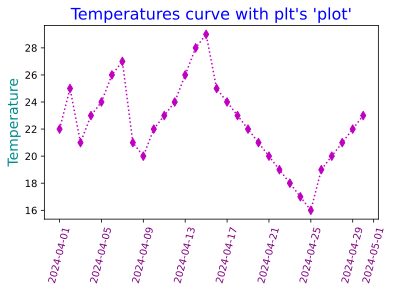

In [40]:
# Representation using matplotlib's plot function
plt.figure(figsize=(6, 3.5))
plt.title("Temperatures curve with plt's 'plot'", fontsize=16, color='blue')
plt.plot(temperature_data["Date"], temperature_data["Temperature"], "md:")
plt.xticks(rotation=75, color='purple')
plt.ylabel("Temperature", fontsize=14, color='darkcyan')
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        If we want <font color='darkpink'>more customization options for plotting points</font>, we should use the <font color='green'>scatter()</font> function (instead of <font color='green'>plot()</font>). It allows to adjust the size of each marker in the scatter plot (via the <font color='green'>s</font> parameter, which is 20 by default), to set the color of the points (via the <font color='green'>c</font> parameter, potentially linked to a color map; the default is blue - "b" -), to choose the markers' shape (via the <font color='green'>marker</font> parameter, which is a disk - "o" - by default), and to control the opacity of the markers (via the <font color='green'>alpha</font> parameter, which is $1$ by default).<br>$\quad$
        For example :

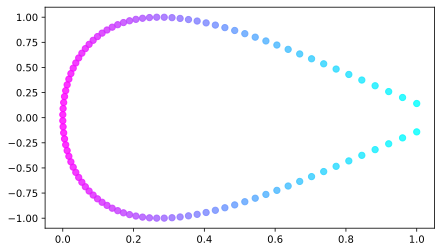

In [41]:
x = np.linspace(-1,1,100)
y1 = x**2
y2 = np.sin(3*x)
y3 = np.exp(-x**2)

plt.figure(figsize=(7, 4))
plt.scatter(y1, y2, c=y3, cmap='cool', s=40, marker='o', alpha=0.8)
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The line style markers may of course be used without dot markers. We can also <font color='darkpink'>specify a line width</font>, with the parameter <font color='green'>linewidth</font>, which has value $1.5$ by default.<br>$\quad$
        For example, let's draw the cosine and sine functions over $[0, 5 \pi]$ :

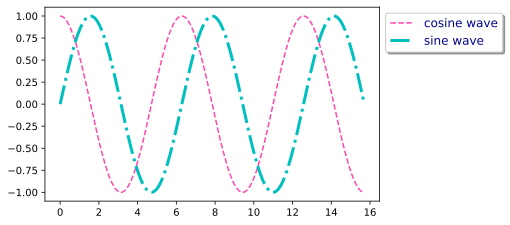

In [42]:
plt.figure(figsize=(6, 3.5))
x = np.linspace(0, 5*np.pi, 200)
y = np.cos(x)
z = np.sin(x)
# 'label' is used to add legends
plt.plot(x, y, "--", color=(1, 0.1, 0.6, 0.8), label="cosine wave")
plt.plot(x, z, "c-.", linewidth=3, label="sine wave")
# Show legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        With <font color='green'>Matplotlib</font> we can <font color='darkpink'>create figures composed of several subplots</font>. In such a case, the variable <font color='green'>fig</font> will refer to the whole figure, while <font color='green'>ax</font> will refer to the individual subplots; subplots are referenced by matrix indices starting at $[0,0]$. Note that, in the particular case where there is only one row (see for example the last cell, cell 46), only one positional argument should be used; and when there is only one subplot (see for example cell 38), no positional arguments are used.<br>$\quad$
        Note that, instead of using <font color='green'>plt.plot()</font>, we use <font color='green'>ax[i,j].plot()</font> for the [i,j]-th subplot. Similarly, <font color='green'>ax[i,j].legend()</font> would be used.<br>$\quad$
        Also, instead of <font color='green'>plt.title()</font>, we use <font color='green'>ax[i,j].set_title()</font>. Similarly, <font color='green'>ax[i,j].set_xlabel()</font>, and <font color='green'>ax[i,j].set_ylabel()</font> would be used.<br>$\quad$
        For example, using <font color='green'>np.random.rand</font>, which returns random numbers sampled from a uniform distribution over $[0, 1[$ :

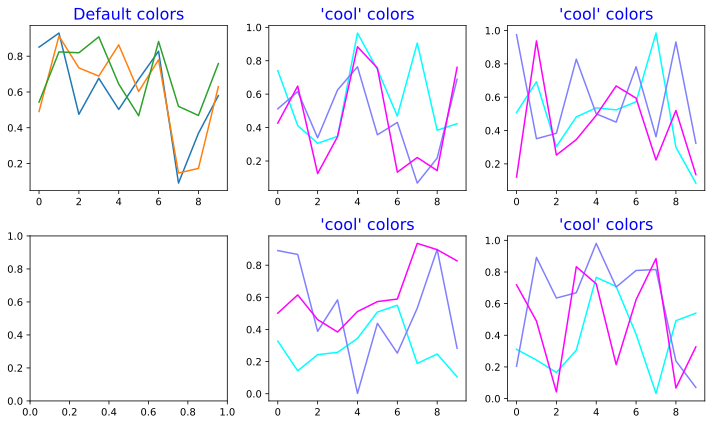

In [43]:
fig, ax = plt.subplots(2,3, figsize=(10,6))
# we can use the default colors
ax[0,0].plot(np.random.rand(10,3))
# or we can use our favorite colors; we need 3 colors, hence we use 'np.linspace(0, 1, 3)',
# so our colors are equidistant and cover the entire colormap spectrum
colors = cmap(np.linspace(0, 1, 3))
for i, color in enumerate(colors):
    ax[0,1].plot(np.random.rand(10), color=color)
    ax[0,2].plot(np.random.rand(10), color=color)
    ax[1,1].plot(np.random.rand(10), color=color)
    ax[1,2].plot(np.random.rand(10), color=color)
# adds titles
ax[0,0].set_title("Default colors", fontsize=16, color='blue')
ax[0,1].set_title("'cool' colors", fontsize=16, color='blue')
ax[0,2].set_title("'cool' colors", fontsize=16, color='blue')
ax[1,1].set_title("'cool' colors", fontsize=16, color='blue')
ax[1,2].set_title("'cool' colors", fontsize=16, color='blue')
# avoids overlaps between subplots
plt.tight_layout()
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Besides dots and curves, <font color='green'>Matplotlib</font> also allows us to <font color='darkpink'>represent matrices</font>. For example, using <font color='green'>np.random.randint(sup, size=(m,n))</font>, which fills an $m \times n$ matrix with random integers from $[0, \text{sup}[$ :

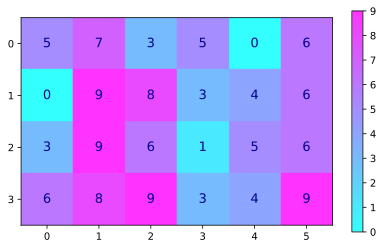

In [44]:
m, n = 4, 6
M = np.random.randint(10, size=(m,n))
plt.figure(figsize=(7, 4))
plt.imshow(M, cmap="cool", alpha=.8)
# sets y-axis ticks to {0, 1, 2, 3}, thus displaying the row indices
plt.yticks(ticks=[0, 1, 2, 3], labels=["0", "1", "2", "3"])
# writes the value of the matrix cells; note that the location is referenced as any
# location in matplotlib (or true maths), ie by specifying the values on the x-axis
# first, contrary to how matrix indices work
for i in range(m):
    for j in range(n):
        # specify the font size, horizontal and vertical alignments, and color of the text
        plt.text(j,i, M[i,j], fontsize=13, ha='center', va='center', color='darkblue')
plt.colorbar()
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        <font color='green'>Matplotlib</font> also allows us to <font color='darkpink'>represent images</font>. This is useful when studying CNNs, for example. We need to import the <font color='green'>imread</font> function from <font color='green'>imageio.v2</font> to convert the image into a matrix of integers (resp. 3d-vectors of integers) when the pixels represent shades of gray (resp. colors).<br>$\quad$
        For example, using <font color='green'>plt.axis('off')</font> to remove the axes, we can display a neat image of Alan Turing :

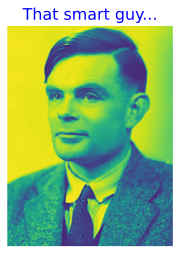

In [45]:
img = imread("https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Alan_Turing_%281951%29_%28crop%29.jpg/250px-Alan_Turing_%281951%29_%28crop%29.jpg")
plt.figure(figsize=(6, 4))
plt.imshow(img)
plt.title("That smart guy...", fontsize=16, color='blue')
# removes the axes
plt.axis('off')
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        <font color='green'>Matplotlib</font> displays the image using its default "viridis" cmap, although the original image was grayscale. Let's display the image <font color='darkpink'>using other cmaps</font> and present them in a row.<br>$\quad$
        As usual when working with subplots, we use <font color='darkcyan'>fig, ax = plt.subplots(m,n,...)</font>. Here <font color='darkcyan'>m=1</font> so the subplots are referenced using only one positional argument.<br>$\quad$
        At last, we can save any <font color='green'>Matplotlib</font> figure by using <font color='darkcyan'>plt.savefig("file_name.format")</font>, where "file_name" is the name of our image, and "format" is the format we want to save it into.

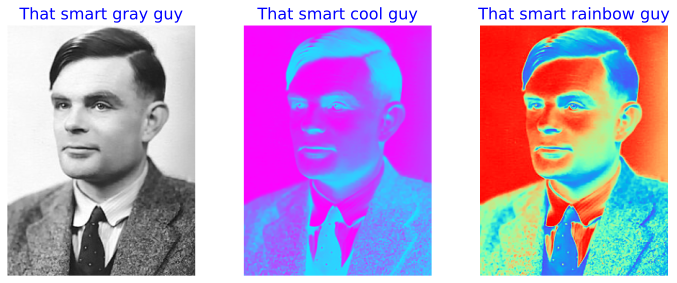

In [46]:
fig, ax = plt.subplots(1,3, figsize=(10, 4))
cmaps = ["gray", "cool", "rainbow"]
# since there is only 1 row, the subplots are referenced using only one positional argument
for i in range(3):
    ax[i].imshow(img, cmap=cmaps[i])
    ax[i].set_title(f"That smart {cmaps[i]} guy", fontsize=16, color='blue')
    ax[i].axis('off')
plt.tight_layout()
plt.savefig("That smart guy.svg")
plt.show()